### Impotar las librerias importantes y crear las funciones que se necesitan

In [7]:
tsim=100;
lapso=113;
pfinal=5650;
paso=(tsim*lapso)/(pfinal);
last=pfinal/lapso;
vthe = 0.1;
vthi = 0.02;
dx=0.1;
simulacion=1;
b_0=[1,2,4];
nombre_carpetas='\Sim';
dirdatos='E:\Simulaciones\Particulas';
dircampos='E:\Simulaciones\Campos';
dirsocha='E:\Simulaciones\Datos Socha';
dirgraficas='D:\Plasma\Graficas';
dirfase=dirgraficas+'\Diagramas de fase';
dirdistribucion=dirgraficas+'\Funciones de distribucion';

In [3]:
import os
import scipy.io
import glob
import numpy as np
import matplotlib.pyplot as plt
import mat73
from mpl_toolkits.axes_grid1 import make_axes_locatable

#####
def rms_sd1d(ar,iout):
    x_rms = np.zeros(int(iout))
    for it in range(int(iout)):
        x_rms[it]  =  np.sqrt(np.mean((ar[:,it]-np.mean(ar[:,it]))**2))
    return x_rms

def rms_mean1d(ar,iout):
    x_rms = np.zeros(int(iout))
    for it in range(int(iout)):
        x_rms[it]  =  np.mean(ar[:,it])
    return x_rms
    
def rms_sd2d(ar,iout):

   x_rms = np.zeros(int(iout))

   for it in range(int(iout)):
        x_rms[it]  =  np.sqrt(np.mean((ar[:,:,it]-np.mean(ar[:,:,it]))**2))

   return x_rms

def rms_mean2d(ar,iout):

   x_rms = np.zeros(int(iout))

   for it in range(int(iout)):
        x_rms[it]  =  np.mean(ar[:,:,it])

   return x_rms


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

########

def get_de(E):
    de=np.zeros(E.shape[0])
    for i in range(E.shape[0]):
        de[i]=np.sqrt(np.mean(E[i,:,:]**2))

    return de



##############


def get_Ex(path,math_file):
    dir=path+'/'+math_file
    mat = mat73.loadmat(dir)
    fields = mat['fields']
    ex = np.array(list(fields[4,:]))
    

    return ex

def get_Ey(path,math_file):
    os.chdir(path)
    mat = scipy.io.loadmat(math_file)
    fields = mat['fields']
    ey = np.array(list(fields[5,:]))


    
    return ey

def get_B(path,math_file):
    os.chdir(path)
    mat = scipy.io.loadmat(math_file)
    fields = mat['fields']
    bx = np.array(list(fields[0,:]))
    #iout=len(bx[0,:])
    #tf=iout*8
    #time = np.linspace(0.0,tf,iout)
    return bx

def get_Temp(path,math_file):
    #VPIC data from matlab
    os.chdir(path)
    mat = scipy.io.loadmat(math_file)
    fields = mat['fields']
    ihydro = mat['ihydro']
    ehydro = mat['ehydro']
    #p_ij is only saved for betap02
    bx = np.array(list(fields[0,:]))
    by = np.array(list(fields[1,:]))
    bz = np.array(list(fields[2,:]))
    ex = np.array(list(fields[3,:]))
    ey = np.array(list(fields[4,:]))
    ez = np.array(list(fields[5,:]))
    rho_i = np.array(list(ihydro[0,:]))
    ux_i = np.array(list(ihydro[1,:]))
    uy_i = np.array(list(ihydro[2,:]))
    uz_i = np.array(list(ihydro[3,:]))
    ppar_i = np.array(list(ihydro[7,:]))
    pper_i = np.array(list(ihydro[8,:]))
    pxx_i = np.array(list(ihydro[9,:]))
    pyy_i = np.array(list(ihydro[10,:]))
    pzz_i = np.array(list(ihydro[11,:]))#
    pyz_i = np.array(list(ihydro[12,:]))
    pzx_i = np.array(list(ihydro[13,:]))
    pxy_i = np.array(list(ihydro[14,:]))
    rho_e = np.array(list(ehydro[0,:]))
    ux_e = np.array(list(ehydro[1,:]))
    uy_e = np.array(list(ehydro[2,:]))
    uz_e = np.array(list(ehydro[3,:]))
    ppar_e = np.array(list(ehydro[7,:]))
    pper_e = np.array(list(ehydro[8,:]))
    pxx_e = np.array(list(ehydro[9,:]))
    pyy_e = np.array(list(ehydro[10,:]))
    pzz_e = np.array(list(ehydro[11,:]))
    pyz_e = np.array(list(ehydro[12,:]))
    pzx_e = np.array(list(ehydro[13,:]))
    pxy_e = np.array(list(ehydro[14,:]))

    de  = np.sqrt(get_de(ex**2))
    due  = np.sqrt(get_de(ux_e**2 + uy_e**2 + uz_e**2))
    dui  = np.sqrt(get_de(ux_i**2 + uy_i**2 + uz_i**2))

    p_par = ppar_i
    p_per = pper_i
    T_tot_i = (1./3)*((p_par/rho_i) + (2.0*(p_per/rho_i)))
    T_tot_i = (1./3)*((p_par/rho_e) + (2.0*(p_per/rho_e)))
    T_tot_i=get_de(T_tot_i)
    Trat = p_per/p_par
    T_per_rms_i = get_de(p_per/rho_i)
    T_par_rms_i = get_de(p_par/rho_i)
    T_rat_rms_i = get_de(Trat)
    p_par = ppar_e
    p_per = pper_e
    T_tot_e = (1./3)*((p_par/rho_e) + (2.0*(p_per/rho_e)))
    T_tot_e=get_de(T_tot_e)
    Trat = p_per/p_par
    T_per_rms_e = get_de(p_per/rho_e)
    T_par_rms_e = get_de(p_par/rho_e)
    T_rat_rms_e = get_de(Trat)

    return T_par_rms_e, T_per_rms_e, T_par_rms_i, T_per_rms_i,T_tot_e,T_tot_i

def gamma(form,time,val1,val2):
    val_k1 = find_nearest(time, value=val1)
    val_k2 = find_nearest(time, value=val2)
    ind_k1 = np.where(time==val_k1)[0][0]
    ind_k2 = np.where(time==val_k2)[0][0]
    fit_ = np.polyfit((time[ind_k1:ind_k2]), np.log(form[ind_k1:ind_k2]), 1)
    a = np.exp(fit_[1])
    b = fit_[0]
    x_fitted = time[ind_k1:ind_k2]
    y_fitted = a * np.exp(b * x_fitted)
    return x_fitted, y_fitted,b

def get_kt(E):
    datakt=np.zeros(shape=(E.shape[0],E.shape[1]))
    for i in range(E.shape[0]):
        datakt[i,:]=np.abs(np.fft.fftshift(np.fft.fft(E[i,:,64])))**2
    return datakt


### Crear nuevas funciones para graficar y obtener los analisis necesarios.


In [4]:
def plot_rms(de,t=100,label=r"$<e>^{1/2}$"):
    import matplotlib.pyplot as plt
    fig,ax=plt.subplots()
    time=np.linspace(0,t,de.shape[0])
    ax.semilogy(time,de,label=label,linewidth =2.5)
    ax.set_xlabel(r"$Time\omega_{pe}^{-1}$",fontsize=18,weight='bold')
    ax.set_ylabel(r"$<e>^{1/2}$",fontsize=18,weight='bold')
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(linewidth=1.0)

def multiplot_rms(names,path,labels,t=100):
    if labels==None:
        labels=[f"sim {i}" for i in range(len(names))]
    for i in range(len(names)):
        E=get_Ex(path,names[i])
        de=get_de(E)
        time=np.linspace(0,t,de.shape[0])
        fig,ax=plt.subplots()
        ax.semilogy(time,de,label=labels[i],linewidth =2.5)
    ax.set_xlabel(r"$Time\omega_{pe}^{-1}$",fontsize=18,weight='bold')
    ax.set_ylabel(r"$<e>^{1/2}$",fontsize=18,weight='bold')
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(linewidth=1.0)

def plot_gamma(names,path,val1,val2,t=100):
    fig,ax=plt.subplots()
    for i in range(len(names)):
        E=get_Ex(path,names[i])
        de=get_de(E)
        time=np.linspace(0,t,de.shape[0])
        
        ax.semilogy(time,de,linewidth =2.5)
        x_fitted, y_fitted,b=gamma(de,time,val1[i],val2[i])
        ax.plot(x_fitted,y_fitted,linewidth =4.5,label=r'${:.2f}$'.format(b))
    ax.legend(loc="best")
    ax.set_xlabel(r"$Time\omega_{pe}^{-1}$",fontsize=18,weight='bold')
    ax.set_ylabel(r"$<e>^{1/2}$",fontsize=18,weight='bold')
    ax.tick_params(axis='both', labelsize=15)
    ax.grid(linewidth=1.0)

def plot_dis(vpar,vper,xlim,ylim,tt):
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    fig,ax=plt.subplots()
    ax.hist2d(vpar,vper,bins=(xlim,ylim),cmap=plt.cm.seismic,norm=LogNorm(),range=[xlim,ylim])
    ax.set_xlabel(r"$V_{\parallel}/ V_{te}$",fontsize=17,weight="bold")
    ax.set_ylabel(r"$V_{\perp}/ V_{te}$",fontsize=17,weight="bold")
    ax.set_title('2D Electron'+' Distribution Function t='+tt+' $w_{pe}^{-1}$',fontsize=21,weight='bold')
    ax.colorbar(label="Frecuency")

def plot_phase_space(v,pos,xlim,ylim,tt):
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    fig,ax=plt.subplots()
    
    l0=ax.hist2d(pos,v,bins=(100,100),cmap=plt.cm.seismic,norm=LogNorm())

    ax.set_xlabel(r"$x [\lambda_D] $",fontsize=17,weight="bold")
    vmax=np.max(l0[3])
    vmin=np.min(l0[3])
    ax.set_ylabel(r"$V / V_{te}$",fontsize=17,weight="bold")
    ax.set_title('2D Electron'+' Phase space t='+str(tt)+' $w_{pe}^{-1}$',fontsize=21,weight='bold')
    cbar = plt.colorbar(l0[3], ax=ax, orientation='vertical', label='Frecuencia')
    

TypeError: E:\Simulaciones\Datos Socha/vd2.mat is not a MATLAB 7.3 file. Load with scipy.io.loadmat() instead.

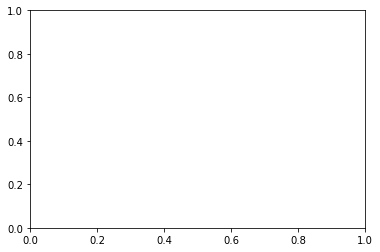

In [8]:
intro=1
names=['vd2.mat','vd4.mat','vd8.mat']

val1=[10,10,20]
val2=[30,25,40]

plot_gamma(names,dirsocha,val1,val2)

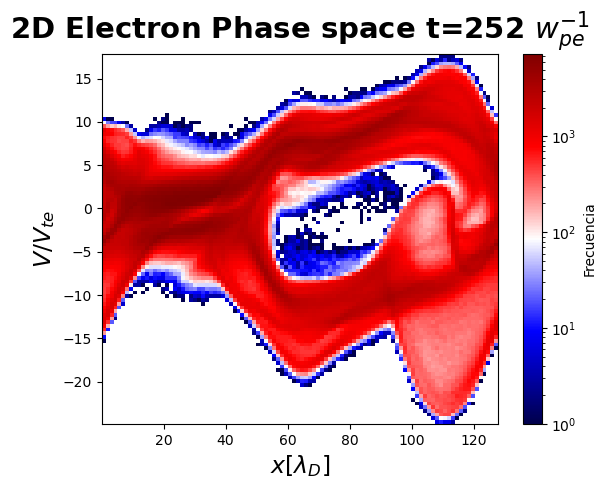

In [39]:

os.chdir("C:/Users/dnaie/OneDrive/Escritorio/datos/particulas")
xgrid = np.linspace(0,128,128)
ygrid = np.linspace(-25,25,100)
mat = scipy.io.loadmat("particle_vd8_t"+str(2820)+".mat")
iparticle = mat["iparticle"]
eparticle = mat["eparticle"]
px=eparticle[0][0][0]
vpar=px*10
py=eparticle[3][0][0]
vper=py/0.1

plot_phase_space(vper,vpar,xgrid,ygrid,252)


In [16]:
vpar.shape

(8388608,)